In [78]:
import pandas as pd

In [4]:
temp_df = pd.read_csv("./finals/dfs/filtered_sequences_case_study_sample_1K.csv")

In [5]:
temp_df["sample_penalty"] = temp_df["max_C_sequence"] - 2

In [6]:
temp_df.head()

,sequence,max_C_sequence,sample_penalty
0,[3*]C(=O)C([4*])C.[1*]C(=O)CCCCCCCCC(=O)C(=O)C...,11,9
1,[3*]C(=O)C([4*])C.[1*]C(=O)CCCCCCCCC(=O)C(=O)C...,11,9
2,[1*]C(=O)C([3*])C.[4*]CCOCC(O)C(=O)C([4*])C|[3...,2,0
3,[1*]C(=O)C([3*])C.[4*]CCOCC(O)C(=O)C([4*])C|[3...,2,0
4,[1*]C([3*])=O.[3*]CC(O)CCCC(=O)C(C)CCC[4*]|[1*...,4,2


In [7]:
temp_df.to_csv("./finals/dfs/p_test.csv")

In [79]:
df = pd.read_csv('bio_polymer_raw.csv')
df.head()

,SN,name,PSMILES,Indexed_PSMILES,SMILES1,SMILES2,term1,term2,polymer_type,reaction_type
0,0,Polyethylene Glycol (PEG),*OCC*,[3*]OCC[4*],C(CO)O,NaN,H,OH,homo,ring-opening
1,1,Polyvinyl Alcohol (PVA),*CC(O)*,[4*]CC(O)[4*],C=CO,NaN,NaN,NaN,homo,chain-growth
2,2,Polyurethane (PU),*C(=O)NC1=CC=C(CC2=CC=C(NC(=O)*)C=C2)C=C1|*OCCO*,[1*]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[1*])C=C2)C=C...,*O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,OCCO,NaN,NaN,co,addition
3,3,Polyester (PET),*OC(=O)c1ccc(cc1)C(=O)OCC*,[3*]OC(=O)c1ccc(cc1)C(=O)OCC[4*],OC(=O)c1ccc(cc1)C(=O)O,OCCO,CCC,O,co,condensation
4,4,Poly-lactic Acid (PLA),*C(C)C(=O)O*,[4*]C(C)C(=O)O[3*],C(C)C(=O)O,NaN,NaN,NaN,homo,ring-opening


In [80]:
ind_smiles_list = df["Indexed_PSMILES"].tolist()

In [81]:
all_ind_smiles = []

In [82]:
for smiles in ind_smiles_list:
    if "|" in smiles:
        split_smiles = smiles.split("|")
        print("split smiles >>", split_smiles)
        all_ind_smiles.extend(split_smiles)
    else:
        all_ind_smiles.append(smiles)

split smiles >> ['[1*]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[1*])C=C2)C=C1', '[3*]OCCO[3*]']
split smiles >> ['[1*]C(=O)C(C)O[3*]', '[1*]C(=O)C(O)[3*]']
split smiles >> ['[4*]CC(O)C[4*]', '[3*]OC(=O)CCCCCCCCC(=O)O[3*]']
split smiles >> ['[3*]OCCCC[4*]', '[1*]C(=O)CCC(=O)[1*]']
split smiles >> ['[4*]CC(C(=O)NC(C)C)[4*]', '[4*]CC(C(=O)NCNC(=O)CCC)[4*]']


In [83]:
all_ind_smiles = set(all_ind_smiles)

In [84]:
len(all_ind_smiles)

25

In [85]:
for smiles in all_ind_smiles:
    print(smiles)

[4*]C(N1CCCC1(=O))C[4*]
[3*]OC(=O)c1ccc(cc1)C(=O)OCC[4*]
[3*]OC(=O)CCCCCCCCCCC(=O)[1*]
[1*]C(=O)CCC(=O)[1*]
[4*]C(C)C(=O)O[3*]
[1*]C(=O)C(C)O[3*]
[4*]CCN[5*]
[4*]CC(C(=O)NCNC(=O)CCC)[4*]
[4*]CC(C)O[3*]
[3*]OCC[4*]
[1*]C(=O)OCCCO[3*]
C1=CC(=CC=C1C(=O)O[3*])OCCCOC2=CC=C(C=C2)C(=O)[1*]
[4*]CCO[3*]
[4*]CC(C(=O)NC(C)C)[4*]
[3*]OC(=O)CCCCCCCCC(=O)O[3*]
[3*]OCCCCCC(=O)[1*]
[4*]CC(C)(C(=O)OCC(O))C[4*]
[4*]CC(OC(=O)C)[4*]
[4*]CC(O)C[4*]
[1*]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[1*])C=C2)C=C1
[1*]C(=O)C(O)[3*]
[3*]OCCO[3*]
[3*]OCC(=O)[1*]
[4*]CC(O)[4*]
[3*]OCCCC[4*]


In [86]:
from rdkit import Chem
from rdkit.Chem import BRICS

In [87]:
Decompositions = []
for smiles in all_ind_smiles:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        res = BRICS.BRICSDecompose(mol)
        Decompositions += res

In [88]:
len(Decompositions), Decompositions[:5]

(57,
 ['[4*]CC([4*])[8*]',
  '[10*]N1CCCC1=O',
  '[3*]O[3*]',
  '[16*]c1ccc([16*])cc1',
  '[4*]CC[4*]'])

In [89]:
with open('indexed_brics_decompositions_at_mod.txt', 'w') as f:
    for decomp in list(set(Decompositions)):
        f.write(decomp + '\n')
print("Decompositions saved to 'brics_indexed_decompositions.txt'")

Decompositions saved to 'brics_indexed_decompositions.txt'


In [90]:
uniques = list(set(Decompositions))

In [92]:
brics_iter = list(BRICS.BRICSBuild(
    [Chem.MolFromSmiles(smiles) for smiles in uniques]))

In [93]:
import joblib
joblib.dump(brics_iter, "indexed_brics_iter_smiles_mod.pkl")

['indexed_brics_iter_smiles_mod.pkl']

In [3]:
smiles_list = df['PSMILES'].tolist()

In [4]:
smiles1 = df['SMILES1'].tolist()
smiles2 = df['SMILES2'].tolist()

In [5]:
smiles = smiles1 + [ x for x in smiles2 if type(x) is not float ]

In [6]:
len(smiles)

26

In [2]:
from rdkit import Chem
from rdkit.Chem import BRICS

In [3]:
def show_mol(mol):
    from rdkit.Chem import Draw
    from IPython.display import display
    img = Draw.MolsToGridImage([mol], molsPerRow=1, subImgSize=(300, 300))
    display(img)
    return img

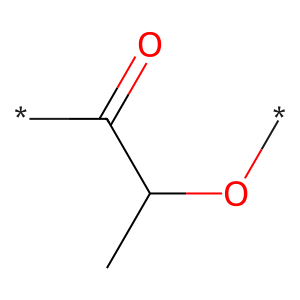

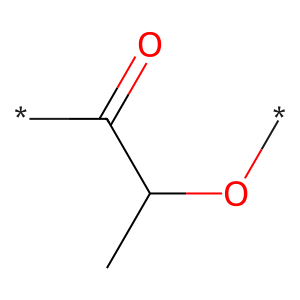

In [ ]:
smiles = "[3*]OC(C)C(=O)[1*]"
mol = Chem.MolFromSmiles(smiles)
show_mol(mol)

In [16]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [48]:
highlight_atoms = [3, 4]
atom_colors = {
    3: (1, 0.3, 0.3),
    4: (1, 0.3, 0.3)
}

In [49]:
drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
drawer.DrawMolecule(mol, highlightAtoms=highlight_atoms, highlightAtomColors=atom_colors)
drawer.FinishDrawing()

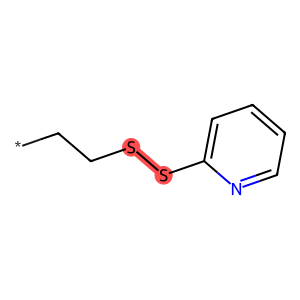

In [50]:
svg = drawer.GetDrawingText().replace('svg:', '')
SVG(svg)

In [51]:
with open("ss.svg", "w") as f:
    f.write(svg)

*CCCN=NN


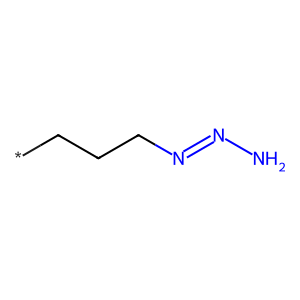

In [45]:
dec = BRICS.BRICSDecompose(mol)
for d in dec:
    print(d)
    m = Chem.MolFromSmiles(d)
    show_mol(m)

In [8]:
replace_s = lambda x: x.replace('|', '.')
replace_at = lambda x: x.replace('*', '[At]')
smiles_list = list(map(replace_s, list(smiles_list)))
smiles_list_at = list(map(replace_at, list(smiles_list)))

In [9]:
list(smiles_list_at)

['[At]OCC[At]',
 '[At]CC(O)[At]',
 '[At]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[At])C=C2)C=C1.[At]OCCO[At]',
 '[At]OC(=O)c1ccc(cc1)C(=O)OCC[At]',
 '[At]OC(C)C(=O)[At]',
 '[At]OCC(=O)[At]',
 '[At]OC(=O)C(C)OC(=O)C(C)[At].[At]OC(=O)COC(=O)CO[At]',
 '[At]OCCCCCC(=O)[At]',
 'C1=CC(=CC=C1C(=O)O[At])OCCCOC2=CC=C(C=C2)C(=O)[At]',
 '[At]OC(=O)CCCCCCCCCCC(=O)[At]',
 '[At]CC(O)C[At].[At]OC(=O)CCCCCCCCC(=O)O[At]',
 '[At]C(=O)OCCCO[At]',
 '[At]CC(OC(=O)C)[At]',
 '[At]CCN[At]',
 '[At]OCCCC[At].[At]C(=O)CCC(=O)[At]',
 '[At]CC(C(=O)NC(C)C)[At].[At]CC(C(=O)NCNC(=O)CCC)[At]',
 '[At]CCO[At]',
 '[At]CC(C)O[At]',
 '[At]C(N1CCCC1(=O))C[At]',
 '[At]CC(C)(C(=O)OCC(O))C[At]']

In [54]:
temp_brics = list(BRICS.BRICSBuild(
    [Chem.MolFromSmiles(smiles) for smiles in ["[16*]c1ccc([16*])cc1", "[1*]C([6*])=O", "[6*]C(=O)[At]"]]))

In [55]:
for t in temp_brics:
    print(t)

|fragment|[16*]c1ccc([16*])cc1|seed|[1*]C([6*])=O|rxn_smiles|[16*][*:2].[6*][*:1]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[6*]-[*:1].[16*]-[*:2]>>[$([C&D3&!R](=O)-&!@[#0,#6,#7,#8]):1]-&!@[$([c&$(c(:c):c)]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|
|fragment|[1*]C([6*])=O|seed|[1*]C(=O)c1ccc([16*])cc1|rxn_smiles|[16*][*:2].[6*][*:1]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[6*]-[*:1].[16*]-[*:2]>>[$([C&D3&!R](=O)-&!@[#0,#6,#7,#8]):1]-&!@[$([c&$(c(:c):c)]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|
|fragment|[6*]C(=O)[At]|seed|[1*]C(=O)c1ccc([16*])cc1|rxn_smiles|[16*][*:2].[6*][*:1]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[6*]-[*:1].[16*]-[*:2]>>[$([

In [ ]:
Decompositions = []
for smiles in smiles:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        res = BRICS.BRICSDecompose(mol)
        Decompositions += res

In [ ]:
mol = Chem.MolFromSmiles("[1*]C(=O)C(C)O[3*].[1*]C(=O)C(O)[3*]")

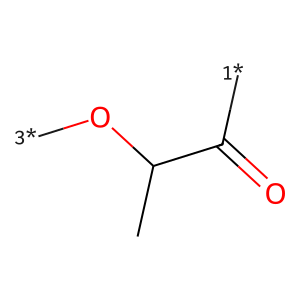

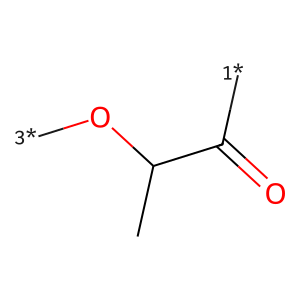

In [15]:
show_mol(mol)

In [11]:
len(Decompositions), Decompositions[:5]  # Display the number of decompositions and the first 5

(37,
 ['OCCO', 'C=CO', '[8*]C[8*]', '[16*]c1ccc(N=C=O)cc1', '[16*]c1ccc([16*])cc1'])

In [12]:
with open('brics_decompositions_at.txt', 'w') as f:
    for decomp in list(set(Decompositions)):
        f.write(decomp + '\n')
print("Decompositions saved to 'brics_decompositions.txt'")

Decompositions saved to 'brics_decompositions.txt'


In [13]:
uniques = list(set(Decompositions))

In [14]:
len(uniques)

30

In [18]:
brics_iter = list(BRICS.BRICSBuild(
    [Chem.MolFromSmiles(smiles) for smiles in uniques]))

In [ ]:
# yield "|fragment|"+ Chem.MolToSmiles(fragment, True) + "|seed|" + Chem.MolToSmiles(seed, True) + "|rxn_smiles|" + Reactions.ReactionToCXSmiles(rxn) + "|rxn_smarts|" + Reactions.ReactionToCXSmarts(rxn)

In [19]:
len(brics_iter)

7656

In [32]:
brics_iter

['|fragment|[3*]O[3*]|seed|[4*]CCCCCC(=O)[At]|rxn_smiles|[3*][*:1].[4*][*:2]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[3*]-[*:1].[4*]-[*:2]>>[$([O&D2]-&!@[#0,#6,#1]):1]-&!@[$([C&!D1&!$(C=*)]-&!@[#6]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|',
 '|fragment|[3*]O[At]|seed|[4*]CCCCCC(=O)[At]|rxn_smiles|[3*][*:1].[4*][*:2]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[3*]-[*:1].[4*]-[*:2]>>[$([O&D2]-&!@[#0,#6,#1]):1]-&!@[$([C&!D1&!$(C=*)]-&!@[#6]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|',
 '|fragment|[5*]N[5*]|seed|[4*]CCCCCC(=O)[At]|rxn_smiles|[4*][*:1].[5*][*:2]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2||rxn_smarts|[4*]-[*:1].[5*]-[*:2]>>[$([C&!D1&!$(C=*)]-&!@[#6]):

In [48]:
import joblib
joblib.dump(brics_iter, "brics_iter_smiles.pkl")

['brics_iter_smiles.pkl']

In [22]:
count = 0 
for r in brics_iter:
    # if count > 10:
    #     break
    print(r)
    # count += 1

In [21]:
list(brics_iter)

[]

In [30]:
master_list = []
temp_tup = ()
counter = 0
for r in brics_iter:
    if type(r) is str:
        if r.startswith("fragment"):
            temp_tup = (counter,r, )
        elif r.startswith("rxn_smiles"):
            temp_tup += (r, )
        elif r.startswith("rxn_smarts"):
            temp_tup += (r, )
            master_list.append(temp_tup)
            temp_tup = ()
            print("done for counter >>", counter)
            counter += 1

done for counter >> 0
done for counter >> 1
done for counter >> 2
done for counter >> 3
done for counter >> 4
done for counter >> 5
done for counter >> 6
done for counter >> 7
done for counter >> 8
done for counter >> 9
done for counter >> 10
done for counter >> 11
done for counter >> 12
done for counter >> 13
done for counter >> 14
done for counter >> 15
done for counter >> 16
done for counter >> 17
done for counter >> 18
done for counter >> 19
done for counter >> 20
done for counter >> 21
done for counter >> 22
done for counter >> 23
done for counter >> 24
done for counter >> 25
done for counter >> 26
done for counter >> 27
done for counter >> 28
done for counter >> 29
done for counter >> 30
done for counter >> 31
done for counter >> 32
done for counter >> 33
done for counter >> 34
done for counter >> 35
done for counter >> 36
done for counter >> 37
done for counter >> 38
done for counter >> 39
done for counter >> 40
done for counter >> 41
done for counter >> 42
done for counter >> 4

In [ ]:
import joblib
joblib.dump(master_list, 'brics_master_list.pkl')

[(0,
  'fragment|[4*]C(C)C|seed|*C(=O)CCCCCCCCCCC([1*])=O',
  'rxn_smiles|[4*][*:1].[5*][*:2]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|',
  'rxn_smarts|[4*]-[*:1].[5*]-[*:2]>>[$([C&!D1&!$(C=*)]-&!@[#6]):1]-&!@[$([N&!D1&!$(N=*)&!$(N-[!#6&!#16&!#0&!#1])&!$([N&R]@[C&R]=O)]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|'),
 (1,
  'fragment|[4*]C(C)C|seed|*C(=O)CCCCCCCCCCC([1*])=O',
  'rxn_smiles|[14*][*:2].[5*][*:1]>>[*:1][*:2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|',
  'rxn_smarts|[5*]-[*:1].[14*]-[*:2]>>[$([N&!D1&!$(N=*)&!$(N-[!#6&!#16&!#0&!#1])&!$([N&R]@[C&R]=O)]):1]-&!@[$([c&$(c(:[c,n,o,s]):[n,o,s])]):2] |atomProp:1.molAtomMapNumber.1:3.molAtomMapNumber.2:4.molAtomMapNumber.1:5.molAtomMapNumber.2|'),
 (2,
  'fragment|[4*]C(C)C|seed|*C(=O)CCCCCCCCCCC([1*])=O',
  'rxn_smiles|[10*][*:1].[13*][*:2]>>[*:1][*:2] |atomProp

In [23]:
count = 0
with open ('brics_results.txt', 'w') as f:
    for r in list(set(results)):
        if isinstance(r, str):
            f.write(r + '\n')
            count += 1
print(f"Total unique BRICS results written to 'brics_results.txt': {count}")

Total unique BRICS results written to 'brics_results.txt': 21204
